In [1]:
import astropy
from astropy.table import Table
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
 

from numpy import *
import matplotlib

import matplotlib.patheffects as pe
import matplotlib.cm as cm

from scipy import stats

In [2]:
def useLatex():
    plt.rcParams.update({"text.usetex":True,
                         "font.family":"lmodern",
                         "text.latex.preamble":r"\usepackage{amsmath,amssymb}"})
    plt.rcParams.update({"font.size":"12"})

# Luptitudes


In [3]:
full_lup= Table.read('MPhys/original_jwst_data/final_skymatched_catalogue_excel_inc.fits',format='fits')

In [64]:
full_cat=full_lup
full_cat

field,id,ra,dec,z_spec,lupt_f1000w_aper0,lupterr_f1000w_aper0,lupt_f105w_aper0,lupterr_f105w_aper0,lupt_f115w-clear_aper0,lupterr_f115w-clear_aper0,lupt_f125w_aper0,lupterr_f125w_aper0,lupt_f1280w_aper0,lupterr_f1280w_aper0,lupt_f140w_aper0,lupterr_f140w_aper0,lupt_f1500w_aper0,lupterr_f1500w_aper0,lupt_f150w-clear_aper0,lupterr_f150w-clear_aper0,lupt_f160w_aper0,lupterr_f160w_aper0,lupt_f1800w_aper0,lupterr_f1800w_aper0,lupt_f182m-clear_aper0,lupterr_f182m-clear_aper0,lupt_f200w-clear_aper0,lupterr_f200w-clear_aper0,lupt_f2100w_aper0,lupterr_f2100w_aper0,lupt_f210m-clear_aper0,lupterr_f210m-clear_aper0,lupt_f275wu_aper0,lupterr_f275wu_aper0,lupt_f277w-clear_aper0,lupterr_f277w-clear_aper0,lupt_f356w-clear_aper0,lupterr_f356w-clear_aper0,lupt_f410m-clear_aper0,lupterr_f410m-clear_aper0,lupt_f435w_aper0,lupterr_f435w_aper0,lupt_f444w-clear_aper0,lupterr_f444w-clear_aper0,lupt_f560w_aper0,lupterr_f560w_aper0,lupt_f606w_aper0,lupterr_f606w_aper0,lupt_f606wu_aper0,lupterr_f606wu_aper0,lupt_f770w_aper0,lupterr_f770w_aper0,lupt_f814w_aper0,lupterr_f814w_aper0,lupt_f1000w_aper1,lupterr_f1000w_aper1,lupt_f105w_aper1,lupterr_f105w_aper1,lupt_f115w-clear_aper1,lupterr_f115w-clear_aper1,lupt_f125w_aper1,lupterr_f125w_aper1,lupt_f1280w_aper1,lupterr_f1280w_aper1,lupt_f140w_aper1,lupterr_f140w_aper1,lupt_f1500w_aper1,lupterr_f1500w_aper1,lupt_f150w-clear_aper1,lupterr_f150w-clear_aper1,lupt_f160w_aper1,lupterr_f160w_aper1,lupt_f1800w_aper1,lupterr_f1800w_aper1,lupt_f182m-clear_aper1,lupterr_f182m-clear_aper1,lupt_f200w-clear_aper1,lupterr_f200w-clear_aper1,lupt_f2100w_aper1,lupterr_f2100w_aper1,lupt_f210m-clear_aper1,lupterr_f210m-clear_aper1,lupt_f275wu_aper1,lupterr_f275wu_aper1,lupt_f277w-clear_aper1,lupterr_f277w-clear_aper1,lupt_f356w-clear_aper1,lupterr_f356w-clear_aper1,lupt_f410m-clear_aper1,lupterr_f410m-clear_aper1,lupt_f435w_aper1,lupterr_f435w_aper1,lupt_f444w-clear_aper1,lupterr_f444w-clear_aper1,lupt_f560w_aper1,lupterr_f560w_aper1,lupt_f606w_aper1,lupterr_f606w_aper1,lupt_f606wu_aper1,lupterr_f606wu_aper1,lupt_f770w_aper1,lupterr_f770w_aper1,lupt_f814w_aper1,lupterr_f814w_aper1,lupt_f1000w_aper2,lupterr_f1000w_aper2,lupt_f105w_aper2,lupterr_f105w_aper2,lupt_f115w-clear_aper2,lupterr_f115w-clear_aper2,lupt_f125w_aper2,lupterr_f125w_aper2,lupt_f1280w_aper2,lupterr_f1280w_aper2,lupt_f140w_aper2,lupterr_f140w_aper2,lupt_f1500w_aper2,lupterr_f1500w_aper2,lupt_f150w-clear_aper2,lupterr_f150w-clear_aper2,lupt_f160w_aper2,lupterr_f160w_aper2,lupt_f1800w_aper2,lupterr_f1800w_aper2,lupt_f182m-clear_aper2,lupterr_f182m-clear_aper2,lupt_f200w-clear_aper2,lupterr_f200w-clear_aper2,lupt_f2100w_aper2,lupterr_f2100w_aper2,lupt_f210m-clear_aper2,lupterr_f210m-clear_aper2,lupt_f275wu_aper2,lupterr_f275wu_aper2,lupt_f277w-clear_aper2,lupterr_f277w-clear_aper2,lupt_f356w-clear_aper2,lupterr_f356w-clear_aper2,lupt_f410m-clear_aper2,lupterr_f410m-clear_aper2,lupt_f435w_aper2,lupterr_f435w_aper2,lupt_f444w-clear_aper2,lupterr_f444w-clear_aper2,lupt_f560w_aper2,lupterr_f560w_aper2,lupt_f606w_aper2,lupterr_f606w_aper2,lupt_f606wu_aper2,lupterr_f606wu_aper2,lupt_f770w_aper2,lupterr_f770w_aper2,lupt_f814w_aper2,lupterr_f814w_aper2,lupt_f1000w_aper3,lupterr_f1000w_aper3,lupt_f105w_aper3,lupterr_f105w_aper3,lupt_f115w-clear_aper3,lupterr_f115w-clear_aper3,lupt_f125w_aper3,lupterr_f125w_aper3,lupt_f1280w_aper3,lupterr_f1280w_aper3,lupt_f140w_aper3,lupterr_f140w_aper3,lupt_f1500w_aper3,lupterr_f1500w_aper3,lupt_f150w-clear_aper3,lupterr_f150w-clear_aper3,lupt_f160w_aper3,lupterr_f160w_aper3,lupt_f1800w_aper3,lupterr_f1800w_aper3,lupt_f182m-clear_aper3,lupterr_f182m-clear_aper3,lupt_f200w-clear_aper3,lupterr_f200w-clear_aper3,lupt_f2100w_aper3,lupterr_f2100w_aper3,lupt_f210m-clear_aper3,lupterr_f210m-clear_aper3,lupt_f275wu_aper3,lupterr_f275wu_aper3,lupt_f277w-clear_aper3,lupterr_f277w-clear_aper3,lupt_f356w-clear_aper3,lupterr_f356w-clear_aper3,lupt_f410m-clear_aper3,lupterr_f410m-clear_aper3,lupt_f435w_aper3,lupterr_f435w_aper3,lupt_f444w-clear_aper3,lu

In [4]:
full_lup['z_spec'][full_lup['z_spec']<0]=np.ma.masked

In [5]:
good= np.ones(len(full_lup))
for i in range(len(full_lup)):
    if np.ma.is_masked(full_lup['z_spec'][i]):
        good[i]=0
good_b=np.array(good, dtype=bool)
lup = full_lup[good_b]

In [6]:
print(len(full_lup),len(lup))

530526 17816


In [ ]:
#miri_filters = ['F1000W','F1280W','F1500W','F1800W','F2100W','F560W','F770W']
#wfc3_ir = ['F105W','F125W','F140W','F160W','F110W']
#wfc3_uvis=['F275W','F606W','F350LP','F225W','F390W']

In [35]:
filts_good=['f555w','f625w','f606w','f775w','f814w',
            'f105w','f110w','f125w','f140w','f160w','f225wu','f275wu','f350lpu','f390wu',
            'f090w-clear','f115w-clear','f150w-clear','f200w-clear','f210m-clear','f277w-clear',
           'f356w-clear','f335m-clear','f444w-clear','f410m-clear','f430m-clear','f460m-clear','f480m-clear']
filts_good

['f555w',
 'f625w',
 'f606w',
 'f775w',
 'f814w',
 'f105w',
 'f110w',
 'f125w',
 'f140w',
 'f160w',
 'f225wu',
 'f275wu',
 'f350lpu',
 'f390wu',
 'f090w-clear',
 'f115w-clear',
 'f150w-clear',
 'f200w-clear',
 'f210m-clear',
 'f277w-clear',
 'f356w-clear',
 'f335m-clear',
 'f444w-clear',
 'f410m-clear',
 'f430m-clear',
 'f460m-clear',
 'f480m-clear']

In [ ]:
filts_bad = ['f1000w','f1280w','f1500w','f1800w','f2100w','f560w','f770w']


names_bad = ['F1000W','F1280W','F1500W','F1800W','F2100W','F560W','F770W']

In [36]:

for i in filts_good:
    names = [i.split('-')[0]for i in filts_good]
#print(names)
names_good = ['F555W','F606W', 'F625W','F775W',  'F814W',
              'F105W','F110W','F125W','F140W','F160W','F225WU','F275WU','F350LPU','F390WU',
              'F090W', 'F115W', 'F150W', 'F200W', 'F210M', 'F277W', 'F356W',
             'F335M', 'F444W', 'F410M', 'F430M', 'F460M', 'F480M']
#print(len(names_good),len(filts_good))
names_good

['F555W',
 'F606W',
 'F625W',
 'F775W',
 'F814W',
 'F105W',
 'F110W',
 'F125W',
 'F140W',
 'F160W',
 'F225WU',
 'F275WU',
 'F350LPU',
 'F390WU',
 'F090W',
 'F115W',
 'F150W',
 'F200W',
 'F210M',
 'F277W',
 'F356W',
 'F335M',
 'F444W',
 'F410M',
 'F430M',
 'F460M',
 'F480M']

f555w
f625w
f606w
f775w
f814w
f105w
f110w
f125w
f140w
f160w
f225wu
f275wu
f350lpu
f390wu
f090w-clear
f115w-clear
f150w-clear
f200w-clear
f210m-clear
f277w-clear
f356w-clear
f335m-clear
f444w-clear
f410m-clear
f430m-clear
f460m-clear
f480m-clear


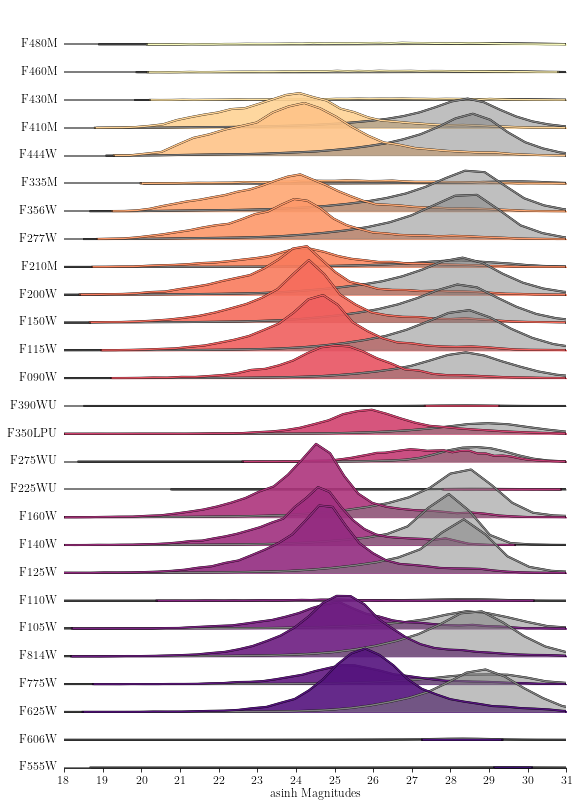

In [75]:
from matplotlib.ticker import MultipleLocator
#all_filts.sort()
#plt.style.use('sty.mplstyle')

fig = plt.figure(figsize=(9,14))
ax = fig.add_subplot()

xmin = 18
xmax = 31

y_scale = 0.001
y_scale1=y_scale*0.02
cols = cm.magma(linspace(0.2,1,len(filts_good)))
#cols1 = cm.GnBu_r(linspace(0.2,1,len(filts_good)))
#times = arange(datetime.datetime(2023,12,1,23,34,32), datetime.datetime(2023,12,11,2,0), datetime.timedelta(hours=5.0,seconds=23)).astype(datetime.datetime)
#print(len(nircam))
for filt,i in zip(filts_good,range(len(filts_good))):
    name =f'lupt_{filt}_aper1'
    f1=[]
    for j in range(len(lup)):
        f1.append(np.ma.is_masked(lup[f'{name}'][j]))
    f1_inv=np.array(np.invert(f1))
    f1_cat =lup[f1_inv*(np.ma.is_masked(lup[f'{name}']) == True)] 

    full=[]
    for j in range(len(full_cat)):
        full.append(np.ma.is_masked(full_cat[f'{name}'][j]))
    full_inv=np.array(np.invert(full))
    full_catalogue =full_cat[full_inv*(np.ma.is_masked(full_cat[f'{name}']) == True)] 

    
    full_plot = full_catalogue[f'{name}']

    #plt.title(f' {name} Luptitude Histogram')

    #ax.hist(f1_cat[f'{name}'],bins =50,histtype = 'step',label=f'{filt}')
    #ni = random.choice([1,2,3,4],size=5)
    #data = concatenate((random.normal(shift[i]+2,3.9,size=n*ni[0]),random.normal(shift[i]-2.3,9,size=n*ni[1]),random.normal(shift[i]+1.5,6,size=n*ni[2]),random.normal(shift[i]+3,5,size=n*ni[3]),random.normal(shift[i]+5,10,size=n*ni[4])))
    useLatex()
    h,xe = histogram(f1_cat[f'{name}'],bins = 40)
    h1,xe1 = histogram(full_plot,bins = 40) #normalised
    plt.fill_between(xe[1:],y_scale*h + i,y2=i,zorder=-i,color=cols[i,:],alpha=0.9)
    plt.fill_between(xe1[1:],y_scale1*h1 + i,y2=i,zorder=-i,color='grey',alpha=0.5)
    #plt.hist(f1_cat[f'{name}'])
    plt.plot(xe1[1:],y_scale1*h1 + i,lw=1.5,zorder=-i,color='grey',path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
    plt.plot(xe[1:],y_scale*h + i,lw=1.5,zorder=-i,color=cols[i,:],path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
    
    plt.plot([xmin,xe[1]],[i,i],'k-',zorder=-i,lw=2,alpha=0.5)
    plt.plot([xe[-1],xmax],[i,i],'k-',zorder=-i,lw=2,alpha=0.5)
   
    print(filt)
    plt.text(xmin-0.2,i+0.03,names_good[i],ha='right',fontsize=12,va='center')


plt.xlim([18,31])
plt.ylim(bottom=0)


ax.tick_params(which='both',tickdir='out',top=False,right=False)

ax.set_yticks([])
ax.set_yticklabels([])

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(1))

#plt.xlabel(r'{\bf Frequency} [kHz]')
ax.spines['top'].set_alpha(0) 
ax.spines['left'].set_alpha(0) 
ax.spines['right'].set_alpha(0)
ax.set_xlabel('asinh Magnitudes',fontsize=12)
#ax.annotate('', xy=(1.0-0.0055, 0.2), xycoords='axes fraction', xytext=(1.0-0.0055, -0.0025), 
  #          bbox=dict(boxstyle="round",facecolor='gray'),clip_on = False,size=45)
#plt.gcf().text(0.925,0.45,r'{\bf Time}',rotation=-90,rotation_mode='anchor',fontsize=40,ha='center')

plt.savefig('luptitude_ridgeplot_all.pdf',bbox_inches='tight')
plt.show()

In [61]:
full_plot = full_cat[f'lupt_f200w-clear_aper1']
f1=[]
for j in range(len(lup)):
    f1.append(np.ma.is_masked(lup[f'lupt_f200w-clear_aper1'][j]))
f1_inv=np.array(np.invert(f1))
f1_cat =lup[f1_inv*(np.ma.is_masked(lup[f'lupt_f200w-clear_aper1']) == True)] 
full_cat

field,id,ra,dec,z_spec,lupt_f1000w_aper0,lupterr_f1000w_aper0,lupt_f105w_aper0,lupterr_f105w_aper0,lupt_f115w-clear_aper0,lupterr_f115w-clear_aper0,lupt_f125w_aper0,lupterr_f125w_aper0,lupt_f1280w_aper0,lupterr_f1280w_aper0,lupt_f140w_aper0,lupterr_f140w_aper0,lupt_f1500w_aper0,lupterr_f1500w_aper0,lupt_f150w-clear_aper0,lupterr_f150w-clear_aper0,lupt_f160w_aper0,lupterr_f160w_aper0,lupt_f1800w_aper0,lupterr_f1800w_aper0,lupt_f182m-clear_aper0,lupterr_f182m-clear_aper0,lupt_f200w-clear_aper0,lupterr_f200w-clear_aper0,lupt_f2100w_aper0,lupterr_f2100w_aper0,lupt_f210m-clear_aper0,lupterr_f210m-clear_aper0,lupt_f275wu_aper0,lupterr_f275wu_aper0,lupt_f277w-clear_aper0,lupterr_f277w-clear_aper0,lupt_f356w-clear_aper0,lupterr_f356w-clear_aper0,lupt_f410m-clear_aper0,lupterr_f410m-clear_aper0,lupt_f435w_aper0,lupterr_f435w_aper0,lupt_f444w-clear_aper0,lupterr_f444w-clear_aper0,lupt_f560w_aper0,lupterr_f560w_aper0,lupt_f606w_aper0,lupterr_f606w_aper0,lupt_f606wu_aper0,lupterr_f606wu_aper0,lupt_f770w_aper0,lupterr_f770w_aper0,lupt_f814w_aper0,lupterr_f814w_aper0,lupt_f1000w_aper1,lupterr_f1000w_aper1,lupt_f105w_aper1,lupterr_f105w_aper1,lupt_f115w-clear_aper1,lupterr_f115w-clear_aper1,lupt_f125w_aper1,lupterr_f125w_aper1,lupt_f1280w_aper1,lupterr_f1280w_aper1,lupt_f140w_aper1,lupterr_f140w_aper1,lupt_f1500w_aper1,lupterr_f1500w_aper1,lupt_f150w-clear_aper1,lupterr_f150w-clear_aper1,lupt_f160w_aper1,lupterr_f160w_aper1,lupt_f1800w_aper1,lupterr_f1800w_aper1,lupt_f182m-clear_aper1,lupterr_f182m-clear_aper1,lupt_f200w-clear_aper1,lupterr_f200w-clear_aper1,lupt_f2100w_aper1,lupterr_f2100w_aper1,lupt_f210m-clear_aper1,lupterr_f210m-clear_aper1,lupt_f275wu_aper1,lupterr_f275wu_aper1,lupt_f277w-clear_aper1,lupterr_f277w-clear_aper1,lupt_f356w-clear_aper1,lupterr_f356w-clear_aper1,lupt_f410m-clear_aper1,lupterr_f410m-clear_aper1,lupt_f435w_aper1,lupterr_f435w_aper1,lupt_f444w-clear_aper1,lupterr_f444w-clear_aper1,lupt_f560w_aper1,lupterr_f560w_aper1,lupt_f606w_aper1,lupterr_f606w_aper1,lupt_f606wu_aper1,lupterr_f606wu_aper1,lupt_f770w_aper1,lupterr_f770w_aper1,lupt_f814w_aper1,lupterr_f814w_aper1,lupt_f1000w_aper2,lupterr_f1000w_aper2,lupt_f105w_aper2,lupterr_f105w_aper2,lupt_f115w-clear_aper2,lupterr_f115w-clear_aper2,lupt_f125w_aper2,lupterr_f125w_aper2,lupt_f1280w_aper2,lupterr_f1280w_aper2,lupt_f140w_aper2,lupterr_f140w_aper2,lupt_f1500w_aper2,lupterr_f1500w_aper2,lupt_f150w-clear_aper2,lupterr_f150w-clear_aper2,lupt_f160w_aper2,lupterr_f160w_aper2,lupt_f1800w_aper2,lupterr_f1800w_aper2,lupt_f182m-clear_aper2,lupterr_f182m-clear_aper2,lupt_f200w-clear_aper2,lupterr_f200w-clear_aper2,lupt_f2100w_aper2,lupterr_f2100w_aper2,lupt_f210m-clear_aper2,lupterr_f210m-clear_aper2,lupt_f275wu_aper2,lupterr_f275wu_aper2,lupt_f277w-clear_aper2,lupterr_f277w-clear_aper2,lupt_f356w-clear_aper2,lupterr_f356w-clear_aper2,lupt_f410m-clear_aper2,lupterr_f410m-clear_aper2,lupt_f435w_aper2,lupterr_f435w_aper2,lupt_f444w-clear_aper2,lupterr_f444w-clear_aper2,lupt_f560w_aper2,lupterr_f560w_aper2,lupt_f606w_aper2,lupterr_f606w_aper2,lupt_f606wu_aper2,lupterr_f606wu_aper2,lupt_f770w_aper2,lupterr_f770w_aper2,lupt_f814w_aper2,lupterr_f814w_aper2,lupt_f1000w_aper3,lupterr_f1000w_aper3,lupt_f105w_aper3,lupterr_f105w_aper3,lupt_f115w-clear_aper3,lupterr_f115w-clear_aper3,lupt_f125w_aper3,lupterr_f125w_aper3,lupt_f1280w_aper3,lupterr_f1280w_aper3,lupt_f140w_aper3,lupterr_f140w_aper3,lupt_f1500w_aper3,lupterr_f1500w_aper3,lupt_f150w-clear_aper3,lupterr_f150w-clear_aper3,lupt_f160w_aper3,lupterr_f160w_aper3,lupt_f1800w_aper3,lupterr_f1800w_aper3,lupt_f182m-clear_aper3,lupterr_f182m-clear_aper3,lupt_f200w-clear_aper3,lupterr_f200w-clear_aper3,lupt_f2100w_aper3,lupterr_f2100w_aper3,lupt_f210m-clear_aper3,lupterr_f210m-clear_aper3,lupt_f275wu_aper3,lupterr_f275wu_aper3,lupt_f277w-clear_aper3,lupterr_f277w-clear_aper3,lupt_f356w-clear_aper3,lupterr_f356w-clear_aper3,lupt_f410m-clear_aper3,lupterr_f410m-clear_aper3,lupt_f435w_aper3,lupterr_f435w_aper3,lupt_f444w-clear_aper3,lu

In [16]:
ab=Table.read('MPhys/original_jwst_data/ab_final_skymatched_catalogue_excel_inc.fits',format='fits')

In [17]:
field_good=np.zeros(len(ab))
for i in range(len(ab)):
    if ab['field'][i]=='gds' or ab['field'][i]=='gdn':
        field_good[i] =1
field_good_b = np.array(field_good,dtype = bool)
ab_new  = ab[field_good_b]

In [18]:

#t['z_spec'][t['z_spec'] < 0] = np.nan
good_ab = np.ones(len(ab_new))
for i in range(len(good_ab)):
    if np.ma.is_masked(ab_new['z_spec'][i]):
        good_ab[i]=0
good_bool_ab  = np.array(good_ab,dtype=bool)
abg = ab_new[good_bool_ab]
#abg

In [19]:
flux =[]
mag=[]
for j in range(len(abg)):
    flux.append((abg['f444w-clear_flux_aper_1'][j]*abg['flux_auto'][j])/abg['flux_aper_1'][j])
for j in range(len(flux)):
    mag.append(23.9-2.5*np.log10(flux[j]))

<ipython-input-19-df0f5c71668f>:6: RuntimeWarning: divide by zero encountered in log10
  mag.append(23.9-2.5*np.log10(flux[j]))
<ipython-input-19-df0f5c71668f>:6: RuntimeWarning: invalid value encountered in log10
  mag.append(23.9-2.5*np.log10(flux[j]))


In [20]:
mag=np.array(mag)
for i in range(len(mag)):
    if np.isnan(mag[i]):
        mag[i]=0

<ipython-input-20-ce79a0c04d26>:1: UserWarning: Warning: converting a masked element to nan.
  mag=np.array(mag)


In [21]:
field_lup=np.zeros(len(lup))
for i in range(len(lup)):
    if lup['field'][i]=='gds' or lup['field'][i]=='gdn':
        field_lup[i] =1
field_lup_b = np.array(field_lup,dtype = bool)
lup_new  = lup[field_lup_b]

In [22]:


#times = arange(datetime.datetime(2023,12,1,23,34,32), datetime.datetime(2023,12,11,2,0), datetime.timedelta(hours=5.0,seconds=23)).astype(datetime.datetime)
#print(len(nircam))

asinh=[]
for j in range(len(lup_new)):
    asinh.append(np.ma.is_masked(lup_new['lupt_f444w-clear_aper1'][j]))
asinh_inv=np.array(np.invert(asinh))
asinh_cat =lup_new[asinh_inv*(np.ma.is_masked(lup_new['lupt_f444w-clear_aper1']) == True)] 

abmag=[]
for p in range(len(mag)):
    abmag.append(np.ma.is_masked(mag[p]))
abmag_inv=np.array(np.invert(abmag))
abmag_cat =mag[abmag_inv*(np.ma.is_masked(mag) == False)] 

abmag2=[]
for l in range(len(mag)):
    abmag2.append(np.isnan(abmag_cat[l]))
abmag_inv2=np.array(np.invert(abmag2))
abmag_cat2 =abmag_cat[abmag_inv2*(np.isnan(abmag_cat) == False)] 

nulls=np.ones(len(abmag_cat2))
for i in range(len(nulls)):
    if abmag_cat2[i]<=10:
        nulls[i]=0
nulls_b=np.array(nulls,dtype=bool)
ab_mags_real = abmag_cat2[nulls_b]

In [23]:
print(len(ab_mags_real),len(asinh_cat['lupt_f444w-clear_aper1']))

7555 6050


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


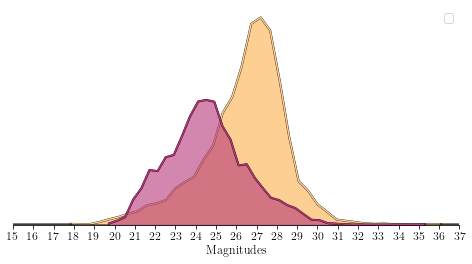

In [31]:
comp = [asinh_cat['lupt_f444w-clear_aper1'],ab_mags_real]
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
names_sing =['asinh \n Magnitudes','AB \n Magnitudes']
xmin = 15
xmax = 40

y_scale = 1
cols = cm.magma([0.5,0.9])
a=[0.6,1]
for i in range(len(comp)):  

    useLatex()
    h,xe = histogram(comp[i],bins = 40)
    plt.fill_between(xe[1:],y_scale*h + i,y2=i,zorder=-i,color=cols[i,:],alpha=a[i])
    plt.plot(xe[1:],y_scale*h + i,lw=1.5,zorder=-i,color=cols[i,:],path_effects=[pe.Stroke(linewidth=2, foreground='k'), pe.Normal()])
    plt.plot([xmin,xe[1]],[i,i],'k-',zorder=-i,lw=2,alpha=0.5)
    plt.plot([xe[-1],xmax],[i,i],'k-',zorder=-i,lw=2,alpha=0.5)

    #plt.text(xmin-0.2,i+0.03,names_sing[i],ha='right',fontsize=10,va='center')
#
plt.legend()
plt.xlim([15,37])
plt.ylim(bottom=0)


ax.tick_params(which='both',tickdir='out',top=False,right=False)

ax.set_yticks([])
ax.set_yticklabels([])

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_locator(MultipleLocator(1))

#plt.xlabel(r'{\bf Frequency} [kHz]')
ax.spines['top'].set_alpha(0) 
ax.spines['left'].set_alpha(0) 
ax.spines['right'].set_alpha(0)
ax.set_xlabel('Magnitudes')
#ax.annotate('', xy=(1.0-0.0055, 0.95), xycoords='axes fraction', xytext=(1.0-0.0055, -0.0025), 
           # arrowprops=dict(arrowstyle="simple",facecolor='gray'),clip_on = False,size=45)
#plt.gcf().text(0.925,0.45,r'{\bf Time}',rotation=-90,rotation_mode='anchor',fontsize=40,ha='center')


plt.savefig('luptitude_ab_comp_ridgeplot_one_axis.pdf',bbox_inches='tight')
plt.show()

In [ ]:
comp = [asinh_cat,ab_mags_real]
asinh_cat